<a href="https://colab.research.google.com/github/joao1barbosa/ml-lab/blob/main/Predi%C3%A7%C3%A3o_de_gera%C3%A7%C3%A3o_Bruky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação de bibliotecas.


In [1]:
!pip install pandas numpy matplotlib

Importação das bibliotecas.


In [2]:
import numpy as np
import pandas as pd

Importação dos dados de geração de energia de Outubro de 2023 a Outubro de 2024.

In [3]:
url = 'https://raw.githubusercontent.com/joao1barbosa/ml-lab/refs/heads/main/geracao_energia.csv'
df_geracao = pd.read_csv(url)

In [4]:
print(df_geracao)

       Data  Energia gerada(kWh)
0   2023/10             73527.14
1   2023/11             76311.63
2   2023/12             79446.45
3   2024/01             80503.63
4   2024/02             66664.83
5   2024/03             59461.22
6   2024/04             62226.98
7   2024/05             55832.88
8   2024/06             47758.45
9   2024/07             48878.33
10  2024/08             56884.30
11  2024/09             70679.71
12  2024/10             67896.32


Importação dos dados de clima de Jataí por hora, de Outubro de 2023 a Outubro 2024, redefinindo o cabeçalhos das colunas para melhor visualização.


In [5]:
url = 'https://raw.githubusercontent.com/joao1barbosa/ml-lab/refs/heads/main/clima_jatai_08-2023_a_08-2024.csv'

df_clima = pd.read_csv(url, sep=';', encoding='latin-1')
df_clima = df_clima.iloc[:, :-1]
df_clima.columns = [
    "Data", "Hora UTC", "Precipitação (mm)", "Pressão (mB)",
    "Pressão Máx (mB)", "Pressão Mín (mB)", "Radiação (Kj/m²)",
    "Temp. Bulbo Seco (°C)", "Temp. Orvalho (°C)", "Temp. Máx (°C)",
    "Temp. Mín (°C)", "Orvalho Máx (°C)", "Orvalho Mín (°C)",
    "Umidade Rel. Máx (%)", "Umidade Rel. Mín (%)",
    "Umidade Rel. Horária (%)", "Vento Direção (°)",
    "Rajada Máx (m/s)", "Velocidade Vento (m/s)"
]

In [6]:
print(df_clima.head())

         Data  Hora UTC Precipitação (mm) Pressão (mB) Pressão Máx (mB)  \
0  2023/10/01  0000 UTC                 0        937,5            937,5   
1  2023/10/01  0100 UTC                 0        938,4            938,4   
2  2023/10/01  0200 UTC                 0        938,9            938,9   
3  2023/10/01  0300 UTC                 0        938,8              939   
4  2023/10/01  0400 UTC                 0        938,3            938,8   

  Pressão Mín (mB) Radiação (Kj/m²) Temp. Bulbo Seco (°C) Temp. Orvalho (°C)  \
0            936,8              NaN                  24,8               19,9   
1            937,5              NaN                  23,7               20,2   
2            938,4              NaN                  23,4               20,3   
3            938,8              NaN                  23,8               19,9   
4            938,3              NaN                  23,3               20,2   

  Temp. Máx (°C) Temp. Mín (°C) Orvalho Máx (°C) Orvalho Mín (°C)  \

Cria coluna única de Data e Hora para a tabela de dados climáticos e remove as anteriores.

In [7]:
df_clima['Data Hora'] = pd.to_datetime(df_clima['Data'] + ' ' + df_clima['Hora UTC'].str.strip(' UTC'), format='%Y/%m/%d %H%M')
df_clima.drop(columns=['Data', 'Hora UTC'], inplace=True)


Cria uma nova coluna de Data usando apenas o mês e o ano de cada linha da tabela

In [8]:
df_clima['Data'] = df_clima['Data Hora'].dt.strftime('%Y/%m')

Defini e executa uma função que irá tratar os dados de clima, padronizando todos os valores numéricos para melhor interpretação.

In [9]:
def format_value(value):
  try:
    return pd.to_numeric(value.str.replace(',', '.'), errors='coerce')
  except AttributeError:
    return value

In [10]:
for column in [
    "Precipitação (mm)", "Pressão (mB)",
    "Pressão Máx (mB)", "Pressão Mín (mB)", "Radiação (Kj/m²)",
    "Temp. Bulbo Seco (°C)", "Temp. Orvalho (°C)", "Temp. Máx (°C)",
    "Temp. Mín (°C)", "Orvalho Máx (°C)", "Orvalho Mín (°C)",
    "Umidade Rel. Máx (%)", "Umidade Rel. Mín (%)",
    "Umidade Rel. Horária (%)", "Vento Direção (°)",
    "Rajada Máx (m/s)", "Velocidade Vento (m/s)"
]:
    df_clima[column] = format_value(df_clima[column])

Agrupa os dados de clima (que são apresentados por hora) para ficar no mesmo padrão dos dados de geração de energia (que são apresentados por mês).

In [11]:
clima_agrupado = df_clima.groupby('Data').agg({
    "Precipitação (mm)": 'sum',          # Soma da precipitação
    "Pressão (mB)": 'mean',              # Média da pressão
    "Pressão Máx (mB)": 'max',           # Máxima da pressão
    "Pressão Mín (mB)": 'min',           # Mínima da pressão
    "Radiação (Kj/m²)": 'sum',           # Soma da radiação
    "Temp. Bulbo Seco (°C)": 'mean',     # Temperatura média
    "Temp. Orvalho (°C)": 'mean',        # Orvalho médio
    "Temp. Máx (°C)": 'max',             # Máxima temperatura
    "Temp. Mín (°C)": 'min',             # Mínima temperatura
    "Orvalho Máx (°C)": 'max',           # Máxima do orvalho
    "Orvalho Mín (°C)": 'min',           # Mínima do orvalho
    "Umidade Rel. Máx (%)": 'max',       # Máxima da umidade relativa
    "Umidade Rel. Mín (%)": 'min',       # Mínima da umidade relativa
    "Umidade Rel. Horária (%)": 'mean',  # Média da umidade relativa
    "Vento Direção (°)": 'mean',         # Direção média do vento
    "Rajada Máx (m/s)": 'max',           # Máxima rajada de vento
    "Velocidade Vento (m/s)": 'mean'     # Velocidade média do vento
}, numeric_only=True).reset_index()


In [12]:
print(clima_agrupado)

       Data  Precipitação (mm)  Pressão (mB)  Pressão Máx (mB)  \
0   2023/10              132.4    936.541129             941.7   
1   2023/11              120.8    936.545694             942.0   
2   2023/12              182.4    936.742625             941.4   
3   2024/01              228.0    937.014073             942.3   
4   2024/02              286.8    938.347414             943.7   
5   2024/03              287.0    938.023925             942.0   
6   2024/04              323.4    938.396389             941.8   
7   2024/05                1.2    940.378091             946.8   
8   2024/06                0.0    941.202500             947.4   
9   2024/07                0.0    942.712903             948.3   
10  2024/08                0.0    941.693817             948.3   
11  2024/09                3.0    938.363472             943.9   
12  2024/10              233.4    937.177688             944.0   

    Pressão Mín (mB)  Radiação (Kj/m²)  Temp. Bulbo Seco (°C)  \
0         

Junta os dois dataframes em um só

In [13]:
df_combinado = pd.merge(df_geracao, clima_agrupado, on=['Data'])

In [14]:
print(df_combinado)

       Data  Energia gerada(kWh)  Precipitação (mm)  Pressão (mB)  \
0   2023/10             73527.14              132.4    936.541129   
1   2023/11             76311.63              120.8    936.545694   
2   2023/12             79446.45              182.4    936.742625   
3   2024/01             80503.63              228.0    937.014073   
4   2024/02             66664.83              286.8    938.347414   
5   2024/03             59461.22              287.0    938.023925   
6   2024/04             62226.98              323.4    938.396389   
7   2024/05             55832.88                1.2    940.378091   
8   2024/06             47758.45                0.0    941.202500   
9   2024/07             48878.33                0.0    942.712903   
10  2024/08             56884.30                0.0    941.693817   
11  2024/09             70679.71                3.0    938.363472   
12  2024/10             67896.32              233.4    937.177688   

    Pressão Máx (mB)  Pressão Mín

Separação de variáveis dependentes (y) e independentes (x)

In [15]:
x = df_combinado.drop(columns=['Data', 'Energia gerada(kWh)'])
# x = df_combinado[['Radiação (Kj/m²)']]
y = df_combinado['Energia gerada(kWh)']

Divide os dados em treinamento e teste

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)


Cria o Modelo de Regressão Linear

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Treina o Modelo

In [18]:
model.fit(X_train, y_train)

# Coeficientes do modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficientes: [-9.89784218e-05 -1.43416602e-06  5.18754831e-07 -1.66001546e-06
  1.37703262e-01  7.85191321e-07 -4.18636358e-07  1.24501159e-06
  2.80127609e-06  1.03750966e-07  2.90502705e-06 -2.07501932e-06
  5.18754831e-06 -5.80046444e-06  5.08702484e-05  3.83878575e-06
  5.92961497e-07]
Intercepto: -16077.320824351526


Apresenta métricas de avaliação do modelo

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Previsões no conjunto de teste
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse:.2f} kWh")
print(f"MAE: {mae} kWh")


MSE: 23882061.527800355
RMSE: 4886.93 kWh
MAE: 3358.099371084235 kWh


Gera um gráfico para visualizar os resultados


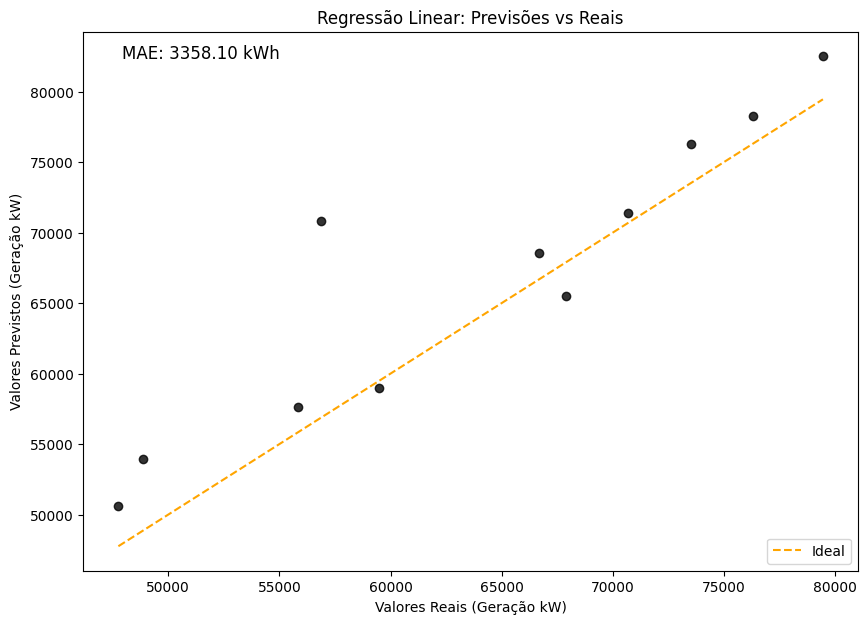

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.8, color="black")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', label="Ideal")
plt.xlabel("Valores Reais (Geração kW)")
plt.ylabel("Valores Previstos (Geração kW)")
plt.title("Regressão Linear: Previsões vs Reais")
plt.legend()
plt.text(x=0.05, y=0.95, s=f"MAE: {mae:.2f} kWh",
         transform=plt.gca().transAxes, fontsize=12)

plt.show()